# Plagirism Detector using Counting Bloom Filter 

## Overview 

Have you ever been to a library and seen the librarian looking for a book? They check their computer, then walk over to the shelves, scan the spines of the books, and repeat the process until they find the one they're looking for. This process can be time-consuming and frustrating, especially if the book isn't there. You wonder if there could be a better way to organize the books so that it becomes easier to check for their availability. One way to do this is to use a list where each book is added as an element. However, this approach becomes inefficient as the number of books increases. Imagine if the library has a million books, the list will become too long and searching for a particular book will take a lot of time.As we have discussed in previous chapters, the time complexity of searching for an item in the list takes O(n), which is far from efficient.
So what can we do to be able to easily check if the book is there or not? In a more efficient way. That's where hash tables come in. A hash table is like a smart list that can quickly find a book based on its title or author's name. Instead of adding books in order, each book is assigned a unique number (hash) based on its title or author's name, and the number is used to store the book in a particular location in the hash table.
For example, suppose you want to search for a book called "Pride and Prejudice" by Jane Austen. The hash function will convert the book's title into a number, say 219, and store the book in the location corresponding to that number in the hash table. When you search for the book, the hash function will convert the title into the same number (219) and quickly look up the location in the hash table. Making the process much more efficient as searching now only takes O(1) time much better than O(n). 
And to implement this and make your process more efficient both in terms of time and space complexity we have a data structure called Bloom Filters a smart subset of a hash table that can quickly determine if a book is in the library or not using the hash value. 


## Bloom Filter 

 
So what exactly are bloom filters?

A Bloom filter is a probabilistic data structure that is used to test and see whether an element is in a set or not. It is a space-efficient data structure. 


However, with this efficient data structure also comes a drawback, as mentioned its definition bloom filters are probabilistic in nature which means that there might be chances of getting false positive results which means that something might be in the set but it will be shown as if it is not. But, on a good note they would never give false negatives which means they would never say something is in the set when it is not. 

Working of a bloom filter 
So to begin with, first we have all bits empty in a bloom filter so everything is set to 0 

0 
0 
0
0 
0 
0


Now, let us assume we need to insert the books into a certain index how would we do that?
First, We woud decide on the number of hash functions to calculate and the “hash function” itself. 
Once we have decided on that, we add an item to that bit. 
Let us just assume that we use 2 hash functions h1 and h2 and we need to add a book called “Hamlet”
So h1(hamlet)%6 = 3  and h1(hamlet)%6  = 4 

So the new memory will look like this 
0 
0 
0
1
1
0


And similarly, we can add other things,

And when we are searching for the book we will reverse our process, will calculate the hash value using h1 and h2 and check if there is a 1 or 0 at that place 
If 1 then yes probably present, because of FPR, else 0 means does not exist. 

But what about deleting?
Unfortunately, we cannot delete an element in a bloom filter, and this is where the Counting Bloom Filter comes in. 

**Counting Bloom Filters**:

A Counting Bloom filter can be seen as an extended version of a Bloom filter in a more generalized form. It is implemented with a counter, so every time there is a new element added or simply the slot is hashed by the hash function, we increment it by 1. And, in addition to insertions and lookups as in bloom filters it also, helps in deletions. 



## Hashing Technique

So as discussed above, hashing is a simple technique,that involves taking a piece of data, such as a string, and running it through a mathematical function called a hash function. The hash function takes the data and produces a unique numerical value that represents it. This value can be used as an index in the bloom filter. However, the choice of hash function also plays an impritnay role. We could easily implement a hash function function like mmh3. However, for the purpose of the assignment we were supposed to make a custom function. 
So, custom hash function is implemented in CBF class which is based on Horner’s method to calculate the hash value from the string, The method works by iteratively updating a hash value based on the ASCII code of each character in the string, using the formula:

                     hash_value = (hash_value * 31 + ord(char)) % self.memory_size



where ord(char) is the ASCII code of the character, returns ASCII value for any character which is an integer from 0 to 255. And 31 is an arbitrary constant chosen for its good distribution properties. so we are calculating that value for every character in input 
then we are adding this value to previous hash value and multiplying with 31 and at last we are taking mod of above value with memory_size, so that it will return value less than memory_size every time. 

Also, to avoid collision It uses multiple hash values to generate different indices in the bit array, and the number of hash functions is calculated using the formula 
num_hashfn = round(memory_size * log(2) / num_item)
And The formula is derived from the probability of a bit being set after a certain number of insertions. (Wikepedia, 2023)
p = (1 - (1 -1m)kn)k

Solving for k, we get:
k = mn* log(2)

Substituting this value of k into the original formula, we get:
p = (1 - e-knm)k    

Solving for k, we get:

k = -log2(p)log2 (1-e(-n/m))
Since we want to calculate the number of hash functions required to achieve a certain false-positive rate (fpr), we can substitute fpr for p in the formula:



This can be simplified as:
k = m * log_2(1/fpr) / n


which is equivalent to:
k = round((m * log(2)) n)


## Main Operations in CBF 



**Insertion**

Insertion operation is used to add an element to the CBF. As seen in Bloom filters, we convert the string into a hash value using the hash function, and using that which is divided by the size of the array (number of spaces for total elements) gives us the exact index where the element should be. After this we would increment the counter by 1. And all of this operations - conversion of the string to the hash value, finding the index value and incrementing the counter takes a coinstant time regardless of the size of the data being inserted, so the time complexity is O(1).


**Searching** 

Further to check if the element is in the set or not, we will follow the same process as insertion, first use hash functions to find hash value and then find the index and then it will go to every slot to check the value of the counter. If the slots have a counter value > 0, then it means that the item probably exist in the set we are saying this because of the probability of false positives. However, if the counter value = 0, then it means that the item does not exist in the set. Again, all of the processes, can be done in a constant time regardless of the data size hence it is O(1).


**Deleting** 

Lastly, to delete or remove an element from the set using counting bloom filter, we start by following the same approach to get the index value of the string to be deleted, once it is found using the hash function, then we decrement the counter by 1. And here again, it takes the same time as inserting or searching which is O(1) since it also involves computing the hash values of the element and accessing the corresponding counters in the filter.



# Implementing CBFs in Python 

In [1]:
#importing libraries 
import math
import string
import random
import matplotlib.pyplot as plt

In [2]:
class CountingBloomFilter():
    """
    Implement the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter
    """
    def __init__(self, fpr, num_item):
        """
        
        Initializes the instances of a CBF.

        Parameters:
        fpr (float): The desired false-positive rate.
        memory_size (int): The size of the filter in bits.
        
        """
        self.fpr = fpr
        self.num_item = num_item 
        #memory size is based on a formula mentioned in the report 
        self.memory_size = - math.floor((self.num_item * math.log(self.fpr))/(math.log(2)**2))
        self.num_hashfn = self.calculate_num_hashfn(fpr)
        #initializing all the bits as 0 
        self.bit_array = [0] * self.memory_size

    def calculate_num_hashfn(self, fpr):
        """
        Calculates the number of hash functions required to achieve the
        desired false-positive rate.

        Parameters:
        fpr (float): The desired false-positive rate.

        Returns:
        int: The number of hash functions required.
        """
        #finding optimal number of hash function using the formula 
        num_hashfn = int(round(self.memory_size * math.log(2) / self.num_item))
        return num_hashfn
    
    def custom_hash(self, key):
        """
        Custom hash function.

        Parameters:
        key (str): The key to hash.

        Returns:
        int: The hash value.
        """
        hash_value = 0
        # Loop through each character in the key
        for char in key:
        # Update the hash value using Horner's method
            hash_value = (hash_value * 31 + ord(char)) % self.memory_size
        return hash_value


    def hash_cbf(self, item):
        """
        Returns the hash values of an item.

        Parameters:
        item (str): The item to hash.

        Returns:
        list: A list of hash values.
        """
        hash_values = []
        
        #going through each hash function to find hash value 
        for i in range(self.num_hashfn):
            seed = i + 1
            hash_value = self.custom_hash(str(seed) + item) % self.memory_size
            hash_values.append(hash_value)
        return hash_values

    def search(self, item):
        """
        Queries the membership of an element in the filter.

        Parameters:
        item (str): The item to search for.

        Returns:
        bool: tells if the item is there or not
        """
        hash_values = self.hash_cbf(item)
        for hash_value in hash_values:
            if self.bit_array[hash_value] == 0:
                return False
        return True

    def insert(self, item):
        """
        Inserts an item into the filter.

        Parameters:
        item (str): The item to insert.
        """
        hash_values = self.hash_cbf(item)
        for hash_value in hash_values:
            #incrementing the counter value
            self.bit_array[hash_value] += 1

    def delete(self, item):
        """
        Removes an item from the filter.

        Parameters:
        item (str): The item to remove.
        """
        hash_values = self.hash_cbf(item)
        for hash_value in hash_values:
            if self.bit_array[hash_value] > 0:
                #decrement the counter value
                self.bit_array[hash_value] -= 1
            else:
                raise ValueError("Item does not exist in the filter.")

## Testing 

This code creates a CountingBloomFilter with a false positive rate of 1% and can store up to 1000 items. It inserts 500 randomly generated strings into the filter and tests whether they exist in the filter using the search method, which should return True. It then generates another 500 random strings that were not inserted into the filter and tests how many false positives are returned. The code calculates the actual false positive rate and ensures that it is within 1% of the desired false positive rate. Finally, it randomly deletes 100 of the previously inserted strings from the filter using the delete method and tests whether they exist in the filter, which should return False.


In [3]:
import random

# initialize the filter with desired false positive rate and number of items
cbf = CountingBloomFilter(0.01, 1000)

# generate 500 random strings to insert into the filter
rand_strings = ["".join(random.choices("abcdefghijklmnopqrstuvwxyz", k=random.randint(5, 15))) for _ in range(500)]

for string in rand_strings:
    cbf.insert(string)

    
# testing insert and search function
for string in rand_strings:
    assert cbf.search(string) == True

    
# generate another 500 random strings to test false positives
false_strings = ["".join(random.choices("abcdefghijklmnopqrstuvwxyz", k=random.randint(5, 15))) for _ in range(500)]

# testing the searching function
num_fps = 0
for string in false_strings:
    if cbf.search(string):
        num_fps += 1

# calculate the actual fpr
actual_fpr = num_fps / len(false_strings)

# assert that the actual fpr is within the desired range
assert abs(actual_fpr - cbf.fpr) < 0.01


strings_to_delete = random.sample(rand_strings, 100)
for string in strings_to_delete:
    cbf.delete(string)

#testing delete function
for string in strings_to_delete:
    assert cbf.search(string) == False


# 4. Effectiveness Testing of CBF using Shakespere's work

Importing shakespere's work

In [4]:
# Import the urllib.request module for downloading Shakespere's data from a URL 
import urllib.request
url = "https://gist.githubusercontent.com/raquelhr/78f66877813825dc344efefdc684a5d6/raw/361a40e4cd22cb6025e1fb2baca3bf7e166b2ec6/"

#method to download the data from the URL
response = urllib.request.urlopen(url)

# read the downloaded data as a string, and then decode it 
data = response.read().decode()

# Split the string into a list of words, using whitespace as the delimiter
words = data.split()

### 4(a) How does the memory size scale with FPR?

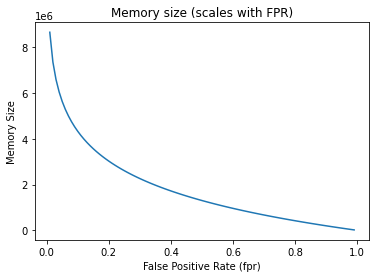

In [5]:
# (4a) memory size scales with FPR
#storing fpr and memory sizes in a list 
fprs = [0.01 * i for i in range(1, 100)]
memory_sizes = []
fpr = 0.01

#iterate through varying fpr
for fpr in fprs:
    cbf = CountingBloomFilter(num_item=len(words), fpr=fpr)
    memory_sizes.append(cbf.memory_size)
    
#plotting graphs
plt.plot(fprs,memory_sizes) 
plt.title('Memory size (scales with FPR)') 
plt.xlabel('False Positive Rate (fpr)') 
plt.ylabel('Memory Size')
plt.show()


### 4 (b) How does the memory size scale with the number of items stored for a fixed FPR?

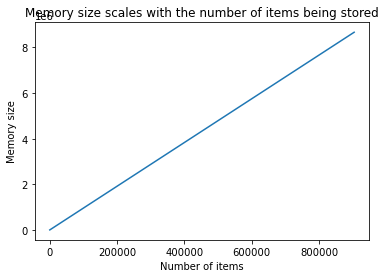

In [6]:
#4(b) memory size scale with the number of items stored for a fixed FPR

# Initialize lists to store number of items and memory size
num_item_list = [] 
memory_size_list = []

fpr = 0.01

# Iterate with varying number of items
for i in range(0, len(words), 100):
    counting_bloom_filter = CountingBloomFilter(num_item=i+1, fpr=fpr)
    
    memory_size_list.append(counting_bloom_filter.memory_size)
    num_item_list.append(i+1)

# Plot the data
plt.plot(num_item_list, memory_size_list)
plt.title('Memory size scales with the number of items being stored')
plt.xlabel('Number of items')
plt.ylabel('Memory size')
plt.show()

### 4(c) How does the actual FPR scale with the number of hash functions?

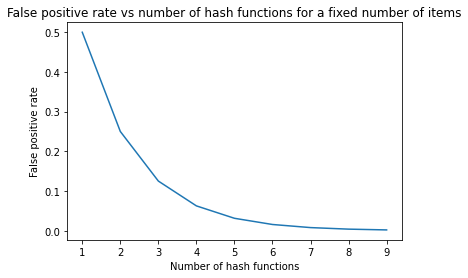

In [252]:
#4(c) the actual FPR scale with the number of hash functions

#making a subclass of CBF 
class CBF2(CountingBloomFilter):
    #changing the parameters 
    def __init__(self, num_items, num_hashfn):
        self.num_items = num_items
        self.num_hashfn = num_hashfn
        #calculated through the mathematical relatins mentioned in the report
        self.memory_size = round((self.num_hashfn / math.log(2)) * self.num_items)
        self.fpr = (1 - (math.exp(-self.num_hashfn * self.num_items / self.memory_size)))**self.num_hashfn
        self.bit_array = [0] * self.memory_size

    def fpr_per_hashfn(self):
        num_hashfn = [i for i in range(1, 10)]
        fprs = []
        for num in num_hashfn:
            cbf = CBF2(num_items=len(words), num_hashfn=num)
            fprs.append(cbf.fpr)
        return (num_hashfn, fprs)

cbf = CBF2(num_items=len(words), num_hashfn=3)
num_hashfn, fprs = cbf.fpr_per_hashfn()

#plot the data 
plt.plot(num_hashfn, fprs)
plt.xlabel('Number of hash functions')
plt.ylabel('False positive rate')
plt.title('False positive rate vs number of hash functions for a fixed number of items')
plt.show()

### Importing data and Data Cleaning:



Before we begin checking if the two versions have some similarities and hence are plagiarized we first need to import it, as seen below the data is imported, and then data is cleaned, by removing any lowercase alphabets, numbers or any other redundant characters like !, # etc which might cause problems when running the checker and give inaccurate results.


In [7]:
from requests import get

def get_txt_into_list_of_words(url):
    '''
    Cleans the text data

    Parameters: 
    url : string
        The URL for the txt file.

    Returns:
    data_just_words_lower_case: list
        List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = get(url).text
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case

url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'

version_1 = get_txt_into_list_of_words(url_version_1)
version_2 = get_txt_into_list_of_words(url_version_2)
version_3 = get_txt_into_list_of_words(url_version_3)


## Plagirism Detector using CBF 


After successfully importing and cleaning the data, we will use a CBF to check plagiarism, so we first input two texts for which we need to check plagiarism and define a false positive rate, and calculate the number of items (num_item) through the length of the first text to be able to call CBF class. Then we would insert all bigrams which are 2 consecutive characters of the text. Here we are assuming that two texts are more likely to be similar if they share many consecutive pairs of characters. into the CBF using its insert operation. And then for each bigram in the second test, check if it is in the CBF using the search operation, and if yes there is, then we count it as a match and store it in a list. And then finally to see how similar the 2 texts are we calculate the similarity rate between the texts which is given by the formula, number of matches/ total no of bigrams in both texts - duplicates.

Note: Even though we clean the data and put it in form of lists, as seen in code above, derived from assignment instructions. The code below takes the strings rather than the list of words, because of the approach used above. 

**Strengths:**
Space Complexity: One of the major strengths of using CBFs is its efficiency, the memory size remains the same throughout because we initialize the parameters like fpr and num_items from the beginning so even if we add more items it would not effect the space which would stll be O(1).
Time complexity: Same goes for time complexity, Inserting ,Searchng or deleting all these main operations take the time of O(1) which is constant so even if the text is really big the operations would be done super quick.
And on the other hand Comparing text word by word requires storing and comparing a large number of words, which can be memory-intensive and time-consuming, especially for large texts or datasets. Using hashing can reduce the memory footprint and improve the performance.

**Limitations:**
False positives: CBFs have a non-zero probability of producing false positives, meaning that some non-plagiarized texts may be incorrectly identified as plagiarized. The probability of false positives increases as the size of the filter and the number of items inserted grows. While a fixed threshold similarity rate may not account for the acceptable level of false positives for a given application, it also introduces the risk of collisions and false positives, particularly if the hash function is not carefully designed or the hash values are not properly distributed.

Text length: The length of texts can impact the performance of CBF-based plagiarism detection. For very short texts, the number of common bigrams may be small, resulting in a low similarity rate even for plagiarized texts. Conversely, for very long texts, the number of bigrams may be too large, leading to a high false positive rate. A fixed threshold similarity rate may not consider the length of the texts.



In [10]:
#plagirism checker using CBF 

def plagiarism_checker(txt1, txt2, fpr=0.01):
    """
    Checks if two texts are similar using a CBF.

    Parameters:
    text1 (str): The first text to check.
    text2 (str): The second text to check.
    fpr (float): The desired false positive rate.

    Returns:
    boolean: True or False 
    similarity_rate(int): 
    """
    
    matches = 0
    #initializing a list that will keep track of all matches 
    numb = []
    n = len(txt1)
    m = len(txt2)
    cbf = CountingBloomFilter(fpr, n)

    # Insert the first text into the Bloom filter
    for i in range(n):
        cbf.insert(txt1[i:i+2])

    # Check if any of the bigrams in the second text are in the BF
    for i in range(m):
        if cbf.search(txt2[i:i+2]) is True: 
            matches +=1 
            numb.append(i)
            
    similarity_rate = matches/(n+m-matches) 
    
    #checking for plagirism 
    if similarity_rate >0.5:
        return True, similarity_rate
    else:
        return False, similarity_rate

In [11]:
print(plagiarism_checker(' '.join(version_1), ' '.join(version_2), fpr=0.01))
print(plagiarism_checker(' '.join(version_1), ' '.join(version_3), fpr=0.01))
print(plagiarism_checker(' '.join(version_2), ' '.join(version_3), fpr=0.01))

(True, 0.9999556963427331)
(True, 1.0130675526024364)
(True, 1.0130675526024364)


## Naive Approach 


Another algorithmic strategy for checking plagiarism between texts is to use a naive approach. This involves comparing the pattern of a string in one text to the other pattern to determine if there are any similarities. Based on these similarities, the algorithm calculates a similarity score.
To begin, the algorithm compares every possible substring in the first text to the other. If a substring matches the pattern, the number of matches is incremented. The similarity score is then computed by dividing the number of matches by the total number of possible substrings of length m in the text string and the total space taken by the algorithm would be O(m) where m would be the length of the string  

**Strengths**
Simple and easy: The algorithm is super simple and easy to understand and implement, you just need to create a nested loop and compare the substrings of the text with the pattern. On the other hand, CBF’s require more operations to implement the algorithm however the time taken by those operations is super quick.



**Limitations**
Time Complexity: The algorithm is highly inefficient due to its time complexity, which is O(m*n), where m and n are the lengths of the texts. The algorithm works by comparing each substring of length m in the text to the pattern, character by character. This requires O(m) operations for each substring, and there are (n - m + 1) substrings in the text that need to be compared. Therefore, the total number of operations required is (n - m + 1) * m, which is O(m * n). This is super inefficient compared to CBF's, which only takes O(1).

Large Datasets: As discussed earlier, the time complexity of this algorithm can become very large, making it impractical for large datasets. This can be seen in the implementation below, which gives incorrect results and falsely claims that there is no plagiarism. This is due to the sheer size of the data. However, the algorithm performs better with smaller datasets.


In [12]:
def approach2(txt, pat):
    
    """
    Implementing naive approach 
    Parameters:
    text (str): The text string to compare.
    pattern (str): The pattern string to compare against.
    
    Returns:
    bool: True or false 
    similarity_rate(int): rate for how similar are the 2 texts 
    """
    
    n = len(txt)
    m = len(pat)
    matches = 0
    
    # Iterate over the range of (n - m + 1) indices of the "txt" string 
    for i in range(n - m + 1):
        j = 0
        while j < m and txt[i + j] == pat[j]:
            j += 1
        if j == m:
            matches += 1
            
    # Calculate the similarity rate
    similarity_rate =  matches / (n - m + 1)
        
    if similarity_rate > 0.5:
        return True, similarity_rate
    else:
        return False,similarity_rate


print(approach2(' '.join(version_1), ' '.join(version_2)))
print(approach2(' '.join(version_1), ' '.join(version_3)))
print(approach2(' '.join(version_2), ' '.join(version_3)))

(False, 0.0)
(False, -0.0)
(False, -0.0)


## Comparing Time complexities

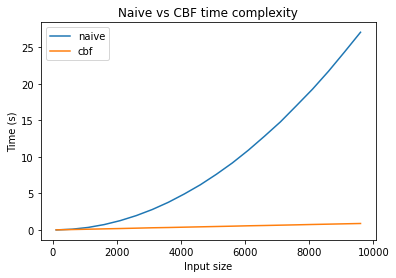

In [13]:
import timeit

# input sizes
sizes = range(100, 10000, 500) 

#for CBF
# Define a list to store the time taken for each input size
times = []

# Test the function for each input size and store the time taken
for size in sizes:
    text = "A" * size
    pattern = "A" * (size // 2)
    t = timeit.timeit(lambda: approach2(text, pattern), number=10)
    times.append(t)
    
#For naive approach 
times_cbf = []

# Test the function for each input size and store the time taken
for size in sizes:
    text = "A" * size
    pattern = "A" * (size // 2)
    t = timeit.timeit(lambda: plagiarism_checker(text, pattern), number=10)
    times_cbf.append(t)

    
# Plot the results
#NAIVE time log
plt.plot(sizes, times, label="naive") 
#CBF time log
plt.plot(sizes, times_cbf, label="cbf") 
plt.xlabel('Input size')
plt.ylabel('Time (s)')
plt.title('Naive vs CBF time complexity')
plt.legend()

plt.show()

As seen in the graph above, with the increase in the number of items, the time required for the plagiarism detection increases as well for the naive approach method. On the other hand, the detecting plagiarism using CBF, the time remains constant, with increase in input size which is in line with our theoretical time complexity as we have discussed above, because CBF’s all operations, have the time complexity of O(1) making it super efficient with large tasks so and for naive approach it increases because time complexity is O(m*n). In conclusion, while the naive approach may seem simple and easy to implement, it quickly becomes inefficient as the number of items increases. On the other hand, the CBF approach offers a constant time complexity and is much more scalable for large datasets. Therefore, using CBF is a better approach for plagiarism checking, especially when dealing with large amounts of data.
